# Importing Libraries

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

import plotly.graph_objs as go
import plotly as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [8]:
import warnings
import pandas as pd

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)


# Dataset

In [10]:
features = pd.read_csv('/content/drive/MyDrive/features.csv')
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')
stores = pd.read_csv('/content/drive/MyDrive/stores.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [12]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [14]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [15]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [16]:
test.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

dataset columns values

In [7]:
pd.DataFrame(features.dtypes, columns=['Type']).T

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Type,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool


In [8]:
pd.DataFrame(train.dtypes, columns=['Type']).T

,Store,Dept,Date,Weekly_Sales,IsHoliday
Type,int64,int64,object,float64,bool


In [9]:
pd.DataFrame(stores.dtypes, columns=['Type']).T

,Store,Type,Size
Type,int64,object,int64


Dataset head

In [10]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [13]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [15]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [11]:
%%time
features.describe()

CPU times: user 27.9 ms, sys: 0 ns, total: 27.9 ms
Wall time: 34.7 ms


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [16]:
%%time
stores.describe()

CPU times: user 4.83 ms, sys: 4.2 ms, total: 9.03 ms
Wall time: 8.65 ms


,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [14]:
%%time
train.describe()

CPU times: user 41.3 ms, sys: 8.01 ms, total: 49.3 ms
Wall time: 54.2 ms


,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


# Pre-Processing

We'll merge data: features and stores have a commom key 'Stores' we can create a new data using the keys 'Store', 'Dept' and 'IsHoliday'. The data will be loaded into 'dataset, dataset_test'.

In [18]:
dataset = train.merge(stores, how='left').merge(features, how='left')
dataset.shape

(421570, 16)

In [19]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [20]:
dataset.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [21]:
dataset_test = test.merge(stores, how='left').merge(features, how='left')
dataset_test.shape

(115064, 15)

In [22]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Year'] = pd.to_datetime(dataset['Date']).dt.year
dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
dataset['Week'] = pd.to_datetime(dataset['Date']).dt.week
dataset['DayOfTheWeek'] = dataset['Date'].dt.dayofweek
dataset['Day'] = pd.to_datetime(dataset['Date']).dt.day
dataset.replace({'A': 1, 'B': 2,'C':3},inplace=True)

dataset_test['Date'] = pd.to_datetime(dataset_test['Date'])
dataset_test['Year'] = pd.to_datetime(dataset_test['Date']).dt.year
dataset_test['Month'] = pd.to_datetime(dataset_test['Date']).dt.month
dataset_test['Week'] = pd.to_datetime(dataset_test['Date']).dt.week
dataset_test['DayOfTheWeek'] = dataset_test['Date'].dt.dayofweek

dataset_test['Day'] = pd.to_datetime(dataset_test['Date']).dt.day
dataset_test.replace({'A': 1, 'B': 2,'C':3},inplace=True)

In [24]:
dataset = dataset[dataset['Weekly_Sales']>= 0]

In [25]:
dataset.describe()

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,DayOfTheWeek,Day
count,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,150200.000000,110918.000000,136667.000000,134535.000000,150948.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.0,420285.000000
mean,22.195477,44.242771,16030.329773,1.589517,136749.569176,60.090474,3.360888,7247.781936,3329.917771,1441.588079,3384.718610,4629.478027,171.212152,7.960077,2010.968443,6.449709,25.827729,4.0,15.673919
std,12.787213,30.507197,22728.500149,0.666411,60992.688568,18.448260,0.458523,8292.900915,9459.871787,9631.415934,6294.807678,5959.849053,39.162280,1.863873,0.796893,3.243394,14.152442,0.0,8.752825
min,1.000000,1.000000,0.000000,1.000000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,2010.000000,1.000000,1.000000,4.0,1.000000
25%,11.000000,18.000000,2117.560000,1.000000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.100000,504.220000,1878.440000,132.022667,6.891000,2010.000000,4.000000,14.000000,4.0,8.000000
50%,22.000000,37.000000,7659.090000,1.000000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.350989,7.866000,2011.000000,6.000000,26.000000,4.0,16.000000
75%,33.000000,74.000000,20268.380000,2.000000,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.445487,8.567000,2012.000000,9.000000,38.000000,4.0,23.000000
max,45.000000,99.000000,693099.360000,3.000000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2012.000000,12.000000,52.000000,4.0,31.000000


from matplotlib import pyplot as plt
_df_0['Store'].plot(kind='hist', bins=20, title='Store')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Dept'].plot(kind='hist', bins=20, title='Dept')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Weekly_Sales'].plot(kind='hist', bins=20, title='Weekly_Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Type'].plot(kind='hist', bins=20, title='Type')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Store', y='Dept', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Dept', y='Weekly_Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Weekly_Sales', y='Type', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Type', y='Size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Store']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Store')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Dept']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Dept')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Weekly_Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Weekly_Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Type']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Type')

from matplotlib import pyplot as plt
_df_13['Store'].plot(kind='line', figsize=(8, 4), title='Store')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Dept'].plot(kind='line', figsize=(8, 4), title='Dept')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Weekly_Sales'].plot(kind='line', figsize=(8, 4), title='Weekly_Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Type'].plot(kind='line', figsize=(8, 4), title='Type')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Store', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Dept', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Weekly_Sales', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Type', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data.

Examine Missing Values



Next we can look at the number and percentage of missing values in each column

In [21]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [22]:
%%time
missing_data(dataset)

CPU times: user 43.6 ms, sys: 0 ns, total: 43.6 ms
Wall time: 44 ms


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,DayOfTheWeek,Day
Total,0,0,0,0,0,0,0,0,0,270889,310322,284479,286603,270138,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.257181,73.611025,67.480845,67.984676,64.079038,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,int64,int64,datetime64[ns],float64,bool,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64


<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

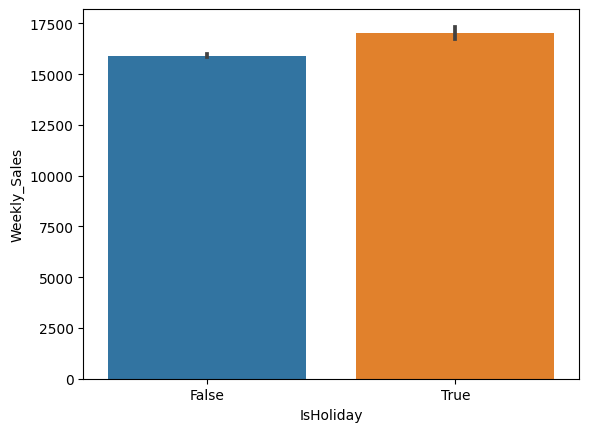

In [27]:
# weekly sales on holydays
holyday = train['Weekly_Sales'].loc[train['IsHoliday']== True ]

# Weekly Sales on Non-holydays
non_holyday = train['Weekly_Sales'].loc[train['IsHoliday'] == False ]

sns.barplot(x = 'IsHoliday', y = 'Weekly_Sales', data=train)

Handling missing values

Package called missingno (https://github.com/ResidentMario/missingno) !pip install quilt

Nullity Matrix. The msno.matrix nullity matrix is a data-dense display which lets you quickly visually analyse data completion.

<Axes: >

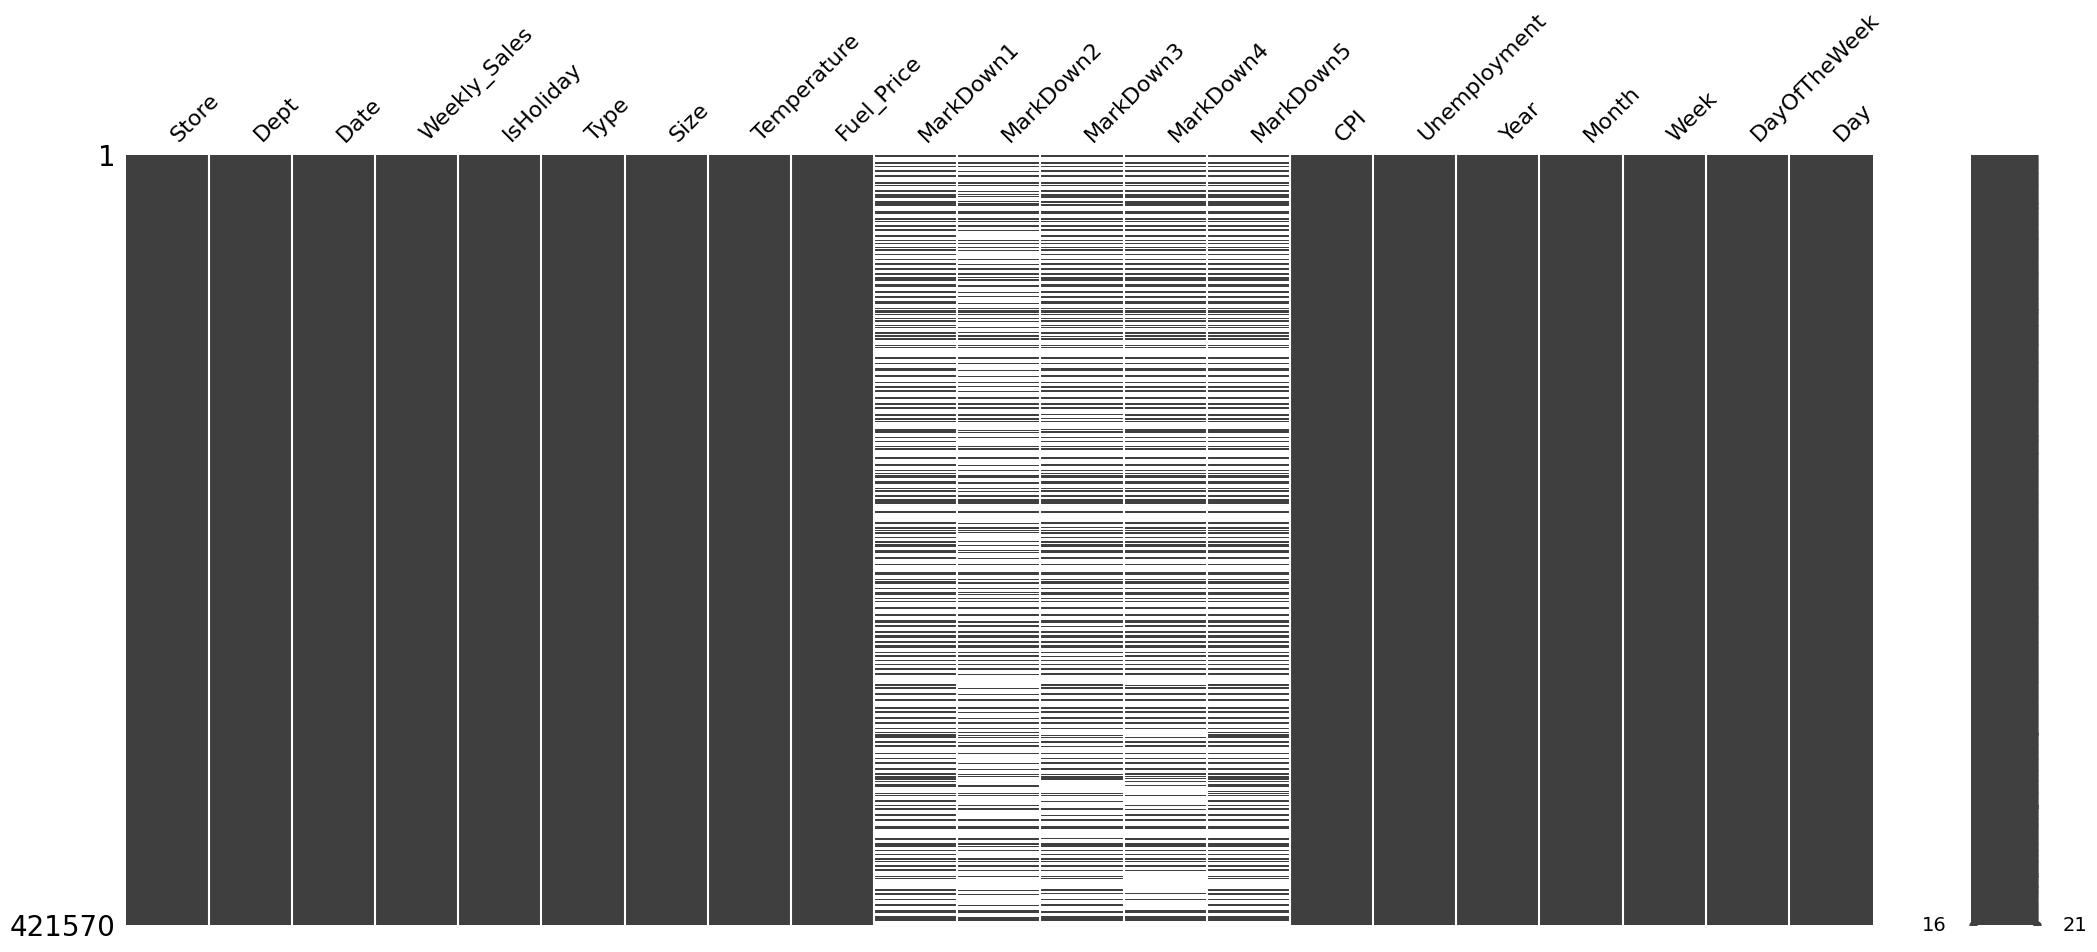

In [25]:
import missingno as msno
msno.matrix(dataset)

CPU times: user 272 ms, sys: 113 ms, total: 385 ms
Wall time: 328 ms


<Axes: >

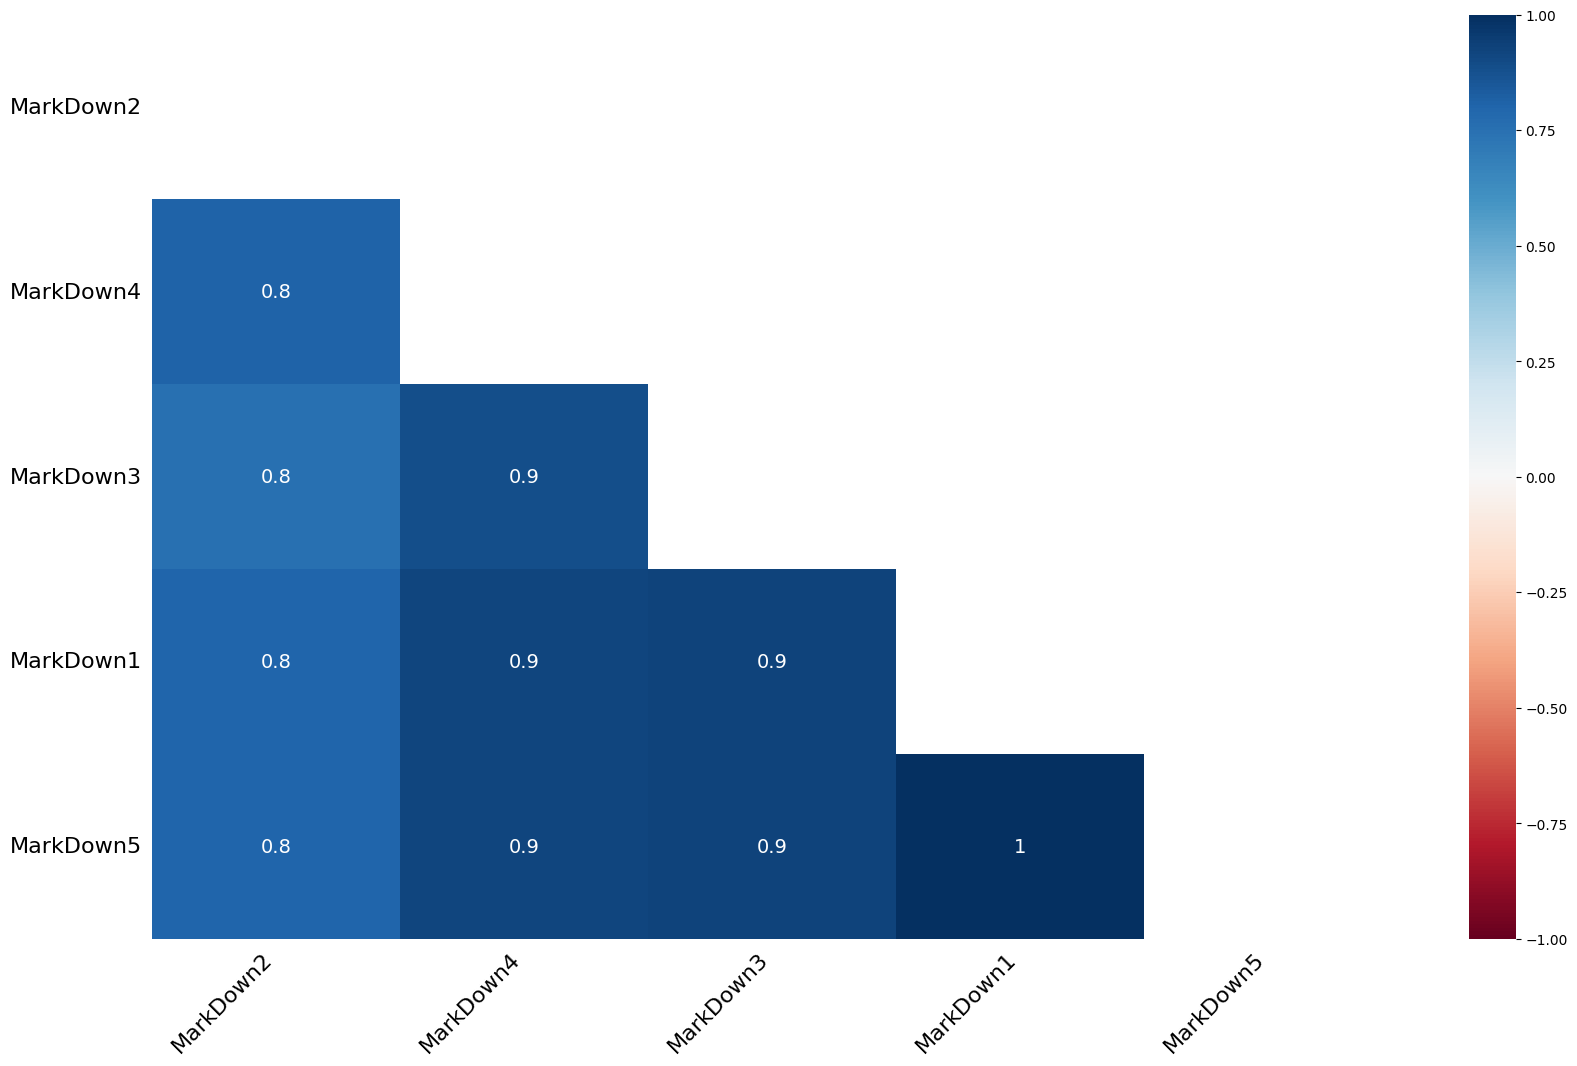

In [26]:
%%time
a = msno.heatmap(dataset, sort='ascending')
a


Column Types

Let's look at the number of columns of each data type. int64 and float64 are numeric variables (which can be either discrete or continuous). object columns contain strings and are categorical features.

In [27]:
# Number of each type of column
dataset.dtypes.value_counts()

float64           10
int64              9
datetime64[ns]     1
bool               1
dtype: int64

Number of unique classes in each object column

In [28]:
# Number of unique classes in each object column
dataset.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

# Correlation


Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.



The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:



.00-.19 “very weak”

.20-.39 “weak”

.40-.59 “moderate”

.60-.79 “strong”

.80-1.0 “very strong”


CPU times: user 1.16 s, sys: 31.2 ms, total: 1.19 s
Wall time: 3.16 s


Text(0.5, 1.0, 'Clustermap')

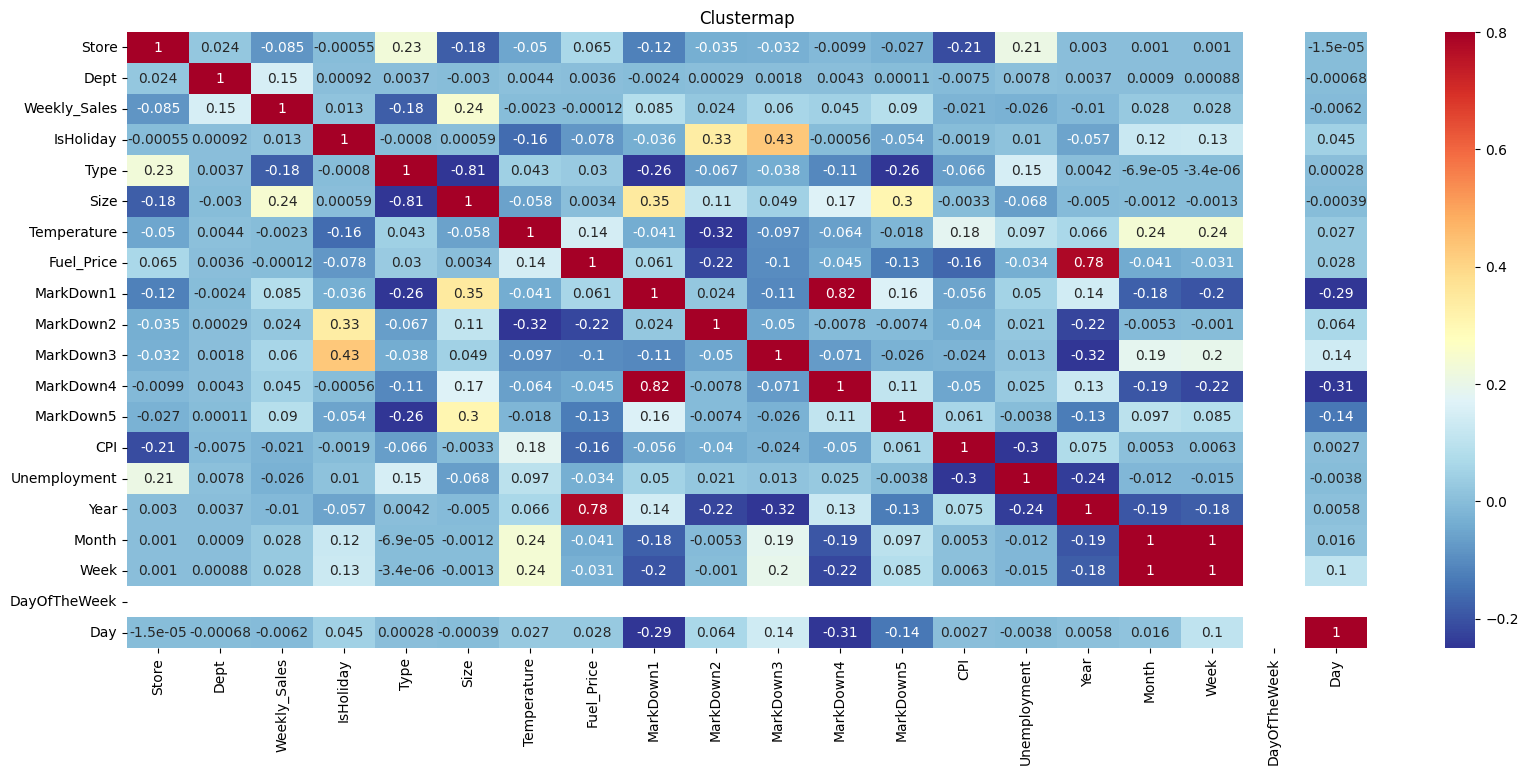

In [29]:
%%time
corrs = dataset.corr()
plt.figure(figsize = (20, 8))
# Heatmap of correlations
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.8)
plt.title('Clustermap');

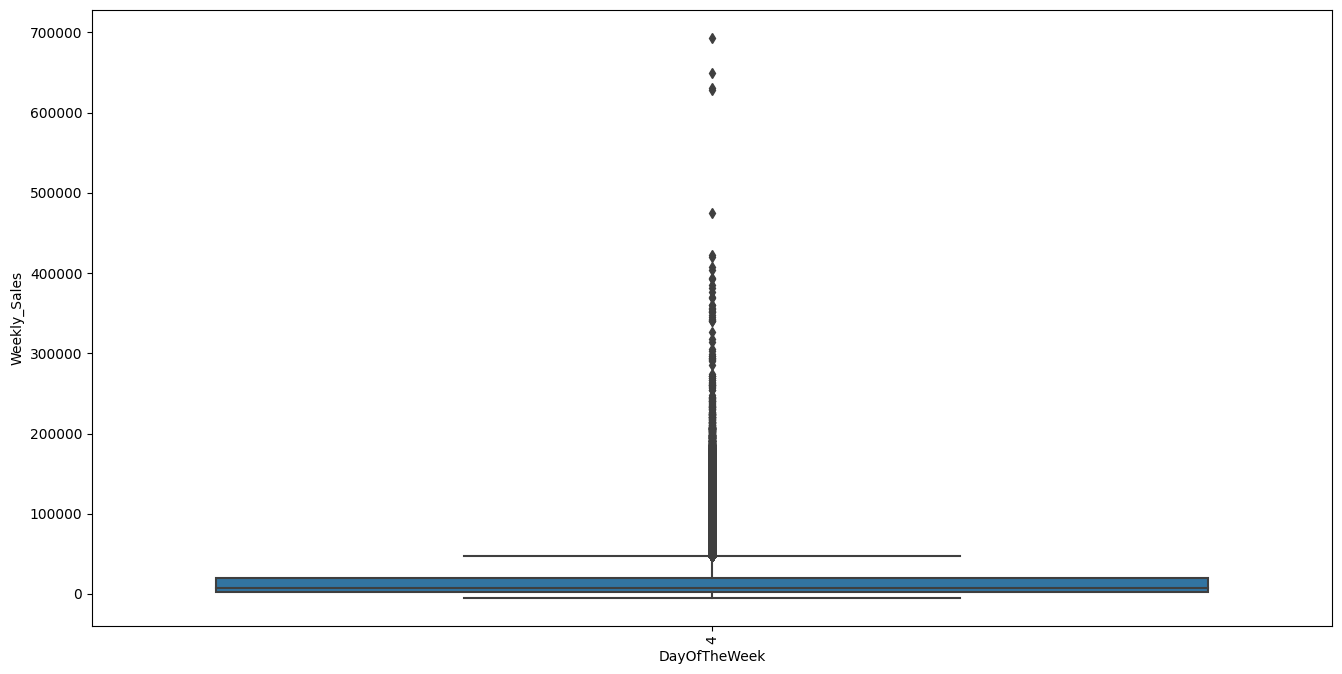

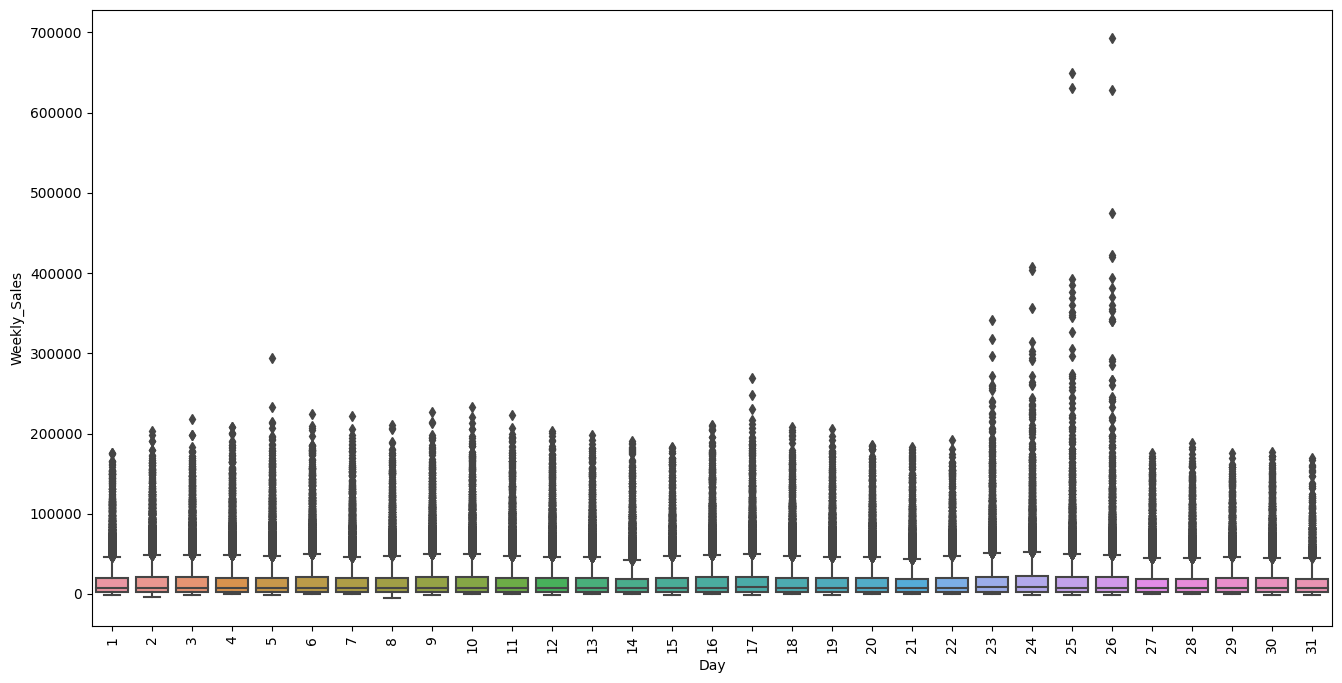

In [41]:
def box_plot_dist_var(var):
#     var = 'DayOfTheWeek'
    data_ = pd.concat([dataset['Weekly_Sales'], dataset[var]], axis=1)
    f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=var, y="Weekly_Sales", data=data_)
    plt.xticks(rotation=90);

box_plot_dist_var("DayOfTheWeek")
box_plot_dist_var("Day")

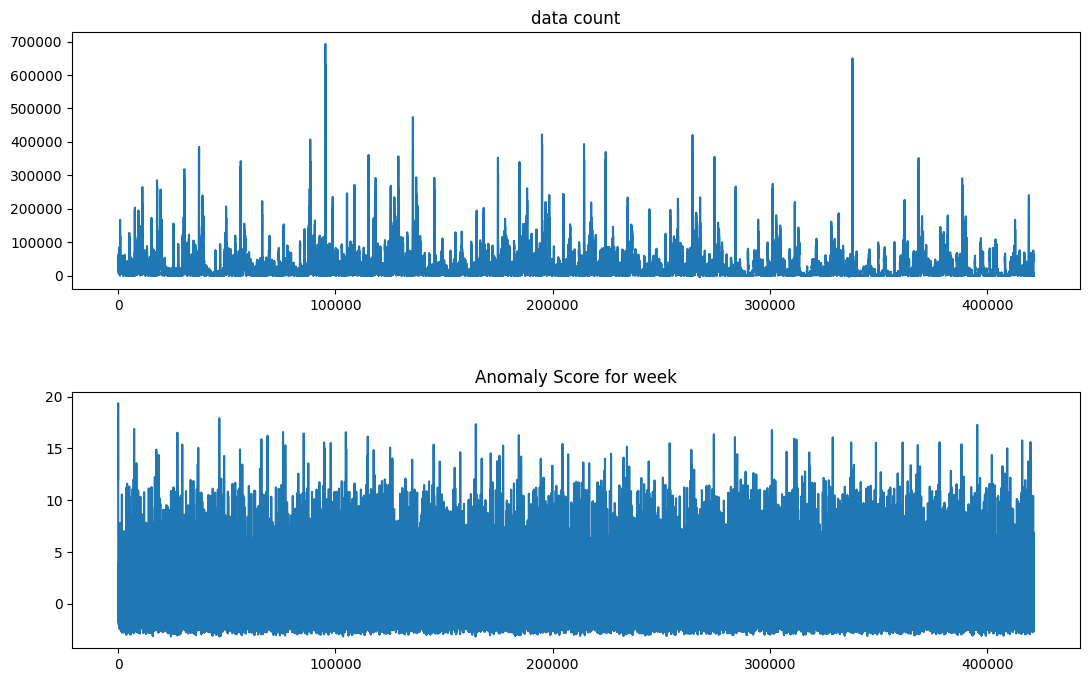

In [50]:
datacf = dataset.Weekly_Sales.values
dataplot1 = changeFinder(datacf, r=0.02, smooth=30)

In [30]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['month'] = dataset['Date'].dt.month
dataset['Year'] = dataset['Date'].dt.year

In [31]:
dataset[['Date','month', 'Year']].head()

,Date,month,Year
0,2010-02-05,2,2010
1,2010-02-12,2,2010
2,2010-02-19,2,2010
3,2010-02-26,2,2010
4,2010-03-05,3,2010


In [33]:
dataset['dayofweek_name'] = dataset['Date'].dt.day_name()
dataset[['Date', 'dayofweek_name']].head()

,Date,dayofweek_name
0,2010-02-05,Friday
1,2010-02-12,Friday
2,2010-02-19,Friday
3,2010-02-26,Friday
4,2010-03-05,Friday


In [38]:
dataset['is_weekend'] = np.where(dataset['dayofweek_name'].isin(['Sunday', 'Saturday']),1,0)
dataset[['Date', 'is_weekend']].head()

,Date,is_weekend
0,2010-02-05,0
1,2010-02-12,0
2,2010-02-19,0
3,2010-02-26,0
4,2010-03-05,0


In [42]:
dataset['IsHoliday'] = dataset['IsHoliday'].astype(int)
del dataset['dayofweek_name']
#del df['Date']

In [43]:
print(dataset.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday    Size  Temperature  \
0      1     1 2010-02-05      24924.50          0  151315        42.31   
1      1     1 2010-02-12      46039.49          1  151315        38.51   
2      1     1 2010-02-19      41595.55          0  151315        39.93   
3      1     1 2010-02-26      19403.54          0  151315        46.63   
4      1     1 2010-03-05      21827.90          0  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  Year  Month  Week  DayOfTheWeek  Day  Type_1  \
0  211.096358         8.106  2010      

In [45]:
df = dataset

In [46]:
print(df.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month',
       'Week', 'DayOfTheWeek', 'Day', 'Type_1', 'Type_2', 'Type_3', 'month',
       'year', 'is_weekend'],
      dtype='object')


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = df.loc[: , df.columns != 'Weekly_Sales']
y = df.loc[: , df.columns == 'Weekly_Sales']
X = X[["Store", "Dept", "Size", "IsHoliday", "CPI", "Temperature", "Type_2", "Type_3", "MarkDown4", "month", "year"]]

y = y.values.reshape(-1,1)
print(X.head())

X_train , X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 4)

   Store  Dept    Size  IsHoliday         CPI  Temperature  Type_2  Type_3  \
0      1     1  151315          0  211.096358        42.31       0       0   
1      1     1  151315          1  211.242170        38.51       0       0   
2      1     1  151315          0  211.289143        39.93       0       0   
3      1     1  151315          0  211.319643        46.63       0       0   
4      1     1  151315          0  211.350143        46.50       0       0   

   MarkDown4  month  year  
0        NaN      2  2010  
1        NaN      2  2010  
2        NaN      2  2010  
3        NaN      2  2010  
4        NaN      3  2010  


In [51]:
import pmdarima
from pmdarima.arima import auto_arima

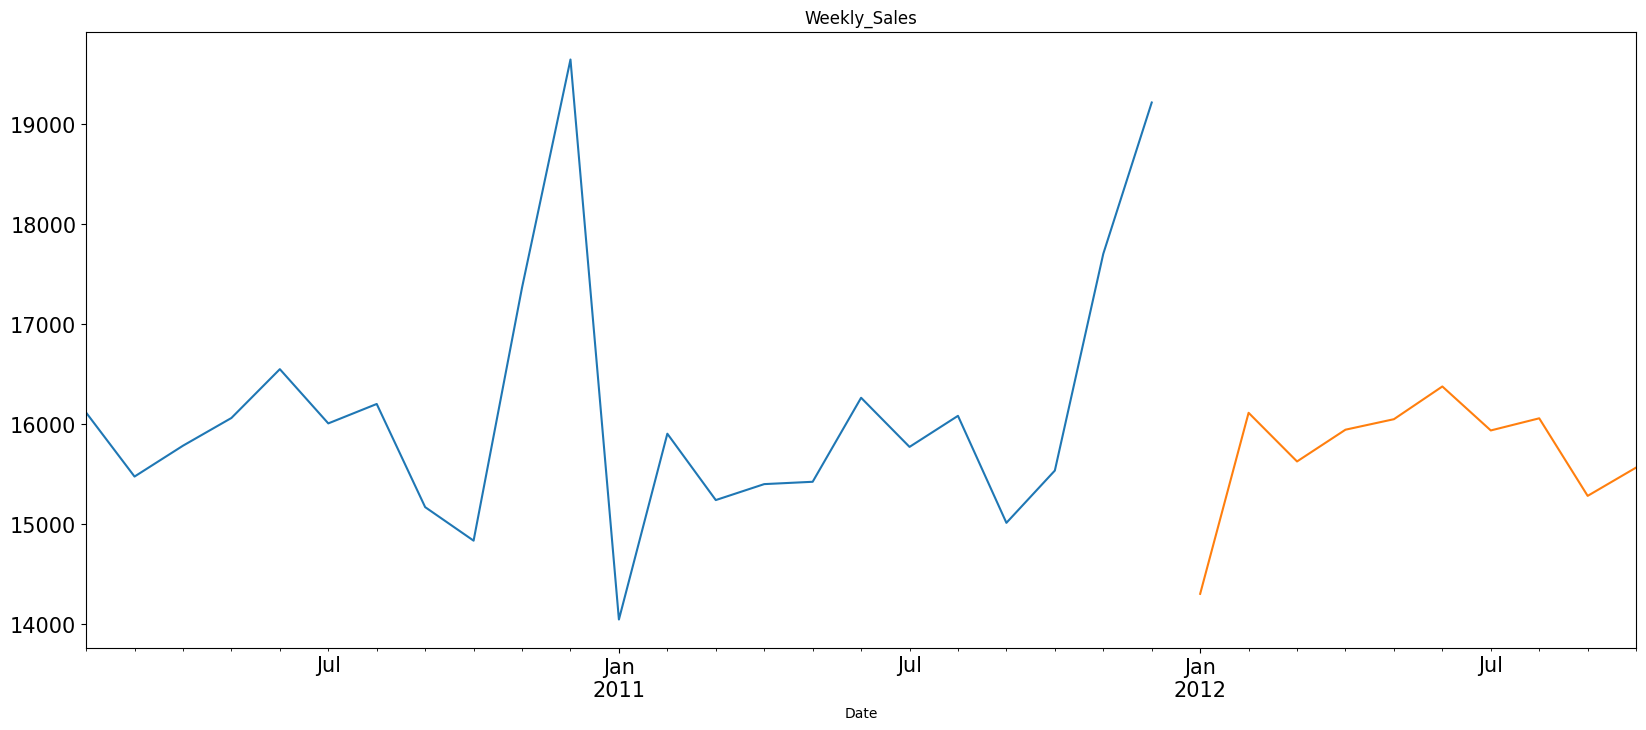

In [53]:
df.Date = pd.to_datetime(df.Date,format = '%Y-%m-%d')
df.index = df.Date
df = df.drop('Date', axis = 1)
df = df.resample('MS').mean()
# Resampling the time series data with month starting first
# Train-Test splitting of time series data
train_data = df[: int(0.7*(len(df)))]
test_data = df[int(0.7*(len(df))):]

train_data = train_data['Weekly_Sales']
test_data = test_data['Weekly_Sales']

# Plot the Weekly_Sales with respect to years in train and test
train_data.plot(figsize=(20,8), title = 'Weekly_Sales', fontsize = 15)
test_data.plot(figsize=(20,8), title = 'Weekly_Sales', fontsize = 15)
plt.show()



In [54]:
model_auto_arima = auto_arima(train_data, trace = True , error_action= 'ignore', suppress_warnings=True  )
model_auto_arima = auto_arima(train_data, trace = True , start_p = 0 , start_q = 0 , start_P =0 , start_Q = 0 , max_p = 10, max_q = 10, max_P = 10 , max_Q = 10 , seasonal = True , stepwise = False , suppress_warnings=True , D = 1 , max_D = 10 , error_action = 'ignore')

model_auto_arima.fit(train_data)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=405.580, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=398.029, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=399.847, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=399.604, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=513.059, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=401.739, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.824 seconds
 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=398.029, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=399.604, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=399.327, Time=0.48 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=399.847, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=401.7

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

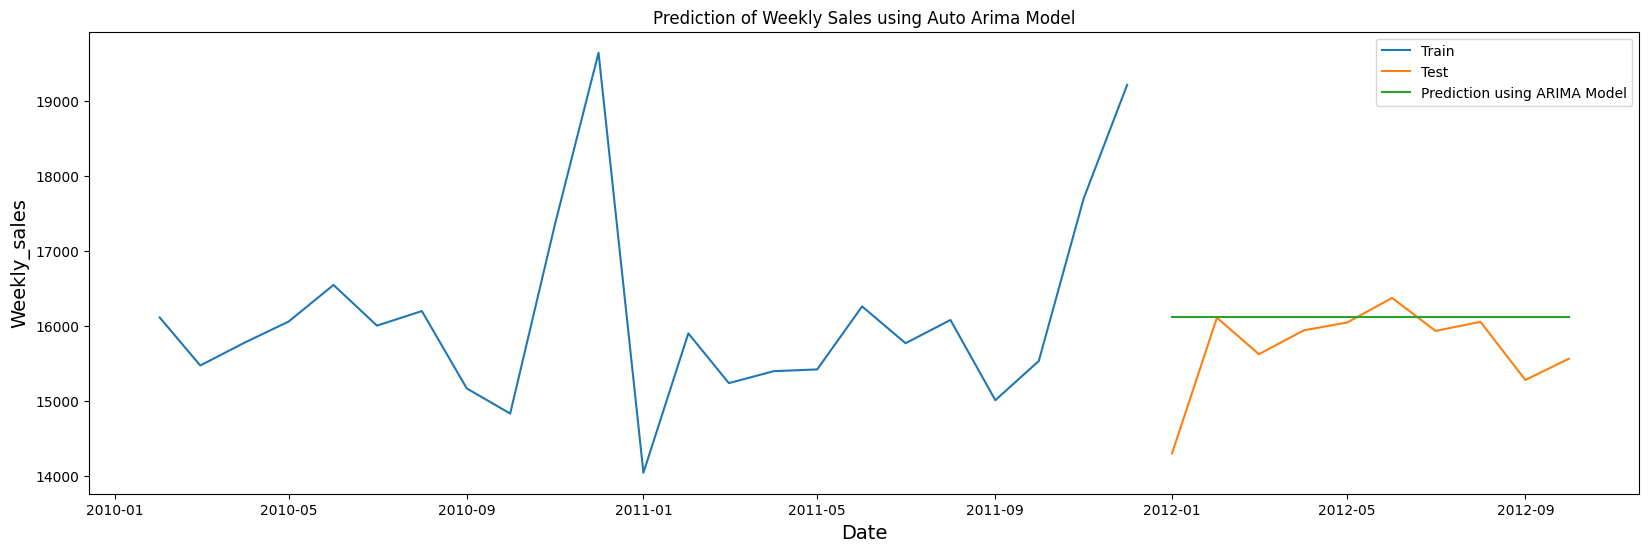

In [56]:
# Predicting the test values using predict function

forecast = model_auto_arima.predict(n_periods = len(test_data))
forecast = pd.DataFrame(forecast,index = test_data.index, columns = ['Prediction'])
plt.figure(figsize = (20,6))
plt.title('Prediction of Weekly Sales using Auto Arima Model')

plt.plot(train_data, label = 'Train')
plt.plot(test_data, label = 'Test')
plt.plot(forecast, label = 'Prediction using ARIMA Model')

plt.legend(loc = 'best')
plt.xlabel('Date', fontsize=14 )
plt.ylabel('Weekly_sales', fontsize = 14)
plt.show()


In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [60]:
# Performance metric for ARIMA model
print( 'Mean Squared Error (MSE) of ARIMA:' , mean_squared_error(test_data, forecast))
print( 'Root Mean Squared Error (RMSE) of ARIMA:' , math.sqrt(mean_squared_error(test_data,forecast)))
print( 'Mean Absolute Deviation (MAD) of ARIMA:', mean_absolute_error(test_data, forecast))


Mean Squared Error (MSE) of ARIMA: 469971.08318421885
Root Mean Squared Error (RMSE) of ARIMA: 685.5443699602665
Mean Absolute Deviation (MAD) of ARIMA: 446.9938500521428


In [85]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

ValueError: ignored

In [63]:
X_train

,Store,Dept,Size,IsHoliday,CPI,Temperature,Type_2,Type_3,MarkDown4,month,year
243061,25,49,128107,1,204.643227,25.89,1,0,NaN,12,2010
184099,19,58,203819,0,137.655290,56.72,0,0,986.74,3,2012
149463,16,11,57197,0,189.575127,37.75,1,0,NaN,4,2010
20125,2,96,202307,0,221.148403,68.08,0,0,4162.20,4,2012
359387,38,83,39690,0,126.128355,99.22,0,1,NaN,7,2010
...,...,...,...,...,...,...,...,...,...,...,...
115407,12,74,112238,0,129.430600,76.36,1,0,NaN,9,2011
406318,44,11,39910,0,130.885355,79.18,0,1,NaN,8,2012
129672,14,12,200898,0,182.442420,72.62,0,0,NaN,6,2010
120986,13,25,219622,0,131.136000,54.41,0,0,7557.14,5,2012


In [83]:
X_train = X_train.dropna()

In [82]:
X_train

,Store,Dept,Size,IsHoliday,CPI,Temperature,Type_2,Type_3,MarkDown4,month,year
243061,25,49,128107,1,204.643227,25.89,1,0,NaN,12,2010
184099,19,58,203819,0,137.655290,56.72,0,0,986.74,3,2012
149463,16,11,57197,0,189.575127,37.75,1,0,NaN,4,2010
20125,2,96,202307,0,221.148403,68.08,0,0,4162.20,4,2012
359387,38,83,39690,0,126.128355,99.22,0,1,NaN,7,2010
...,...,...,...,...,...,...,...,...,...,...,...
115407,12,74,112238,0,129.430600,76.36,1,0,NaN,9,2011
406318,44,11,39910,0,130.885355,79.18,0,1,NaN,8,2012
129672,14,12,200898,0,182.442420,72.62,0,0,NaN,6,2010
120986,13,25,219622,0,131.136000,54.41,0,0,7557.14,5,2012


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 50, max_depth= 20 , min_samples_split= 3, min_samples_leaf= 1)
rf.fit (X_train, y_train.ravel())
print( 'Accuracy: ' ,rf.score(X_test,y_test.ravel())*100,'%')

y_pred = rf.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rms = mean_squared_error(y_test, y_pred, squared = False )
print('RMSE:' , rms )
print('MAE:', mean_absolute_error(y_test, y_pred))

ValueError: ignored

In [74]:
import xgboost as xgb
import warnings

In [76]:
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', nthreads = 4, n_estimators = 500 , max_depth = 4 , learning_rate = 0.5 )
xg_reg.fit(X_train , y_train )

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None, nthreads=4,
             num_parallel_tree=None, ...)

In [79]:
pred = xg_reg.predict(X_train)
y_pred = xg_reg.predict(X_test)
print( 'Accuracy:', xg_reg.score(X_test, y_test)*100, '%')

rms = mean_squared_error(y_test, y_pred, squared = False )
print('RMSE:', rms)

print('MAE:',mean_absolute_error(y_test, y_pred))

Accuracy: 93.4370126737608 %
RMSE: 5836.7018351496745
MAE: 3044.4736011197256


In [80]:
print('Training Accuracy :' , xg_reg.score(X_train, y_train )*100, '%')

Training Accuracy : 94.3954041409121 %


In [29]:
dataset = pd.get_dummies (dataset, columns = ['Type' ] )

We calculate now the correlations between the features in dataset. The following table shows the first 15 the least correlated features.

In [30]:
%%time
features = dataset.columns.values
corrs_ = dataset[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
corrs_ = corrs_[corrs_['level_0'] != corrs_['level_1']]
corrs_.head(15).T

CPU times: user 458 ms, sys: 28.1 ms, total: 486 ms
Wall time: 494 ms


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
level_0,Type,Week,Day,Store,Type,Month,MarkDown5,Dept,Fuel_Price,Weekly_Sales,Type,Day,MarkDown2,Dept,Day
level_1,Week,Type,Store,Day,Month,Type,Dept,MarkDown5,Weekly_Sales,Fuel_Price,Day,Type,Dept,MarkDown2,Size
0,0.000003,0.000003,0.000015,0.000015,0.000069,0.000069,0.000109,0.000109,0.00012,0.00012,0.000279,0.000279,0.00029,0.00029,0.000386


Let's look to the top 15 most correlated features, besides the same feature pairs.

In [31]:
corrs_.tail(15).T

,384,385,386,387,388,389,390,391,392,393,394,395,396,398,399
level_0,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,Day
level_1,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day,DayOfTheWeek
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature Selection

Find the optimal feature subset using an evaluation measure. The choice of evaluation metric distinguish the three main strategies of feature selection algorithms: the wrapper strategy, the filter strategy, and the embedded strategy
    

Filter methods:
    
    

information gain

chi-square test

correlation coefficient

variance threshold


Wrapper methods:
    

recursive feature elimination

sequential feature selection algorithms


Embedded methods:
    

L1 (LASSO) regularization

decision tree

In our case, we remove some useless, redundant variables. We will use three methods for feature selection: Remove collinear features, remove features with greater than a threshold percentage of missing values, keep only the most relevant features using feature importances from a model

Remove Collinear Variables¶

Collinear variables are those which are highly correlated with one another. These can decrease the model's availablility to learn, decrease model interpretability, and decrease generalization performance on the test set.


guidelines:Drop Highly Correlated Features

In [32]:
# Threshold for removing correlated variables
threshold = 0.92

# Absolute value correlation matrix
corr_matrix = dataset.corr().abs()
corr_matrix.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,DayOfTheWeek,Day
Store,1.000000,0.024004,0.085195,0.000548,0.226410,0.182881,0.050097,0.065290,0.119588,0.035173,0.031556,0.009941,0.026634,0.211088,0.208552,0.002997,0.001011,0.001031,NaN,0.000015
Dept,0.024004,1.000000,0.148032,0.000916,0.003708,0.002966,0.004437,0.003572,0.002426,0.000290,0.001784,0.004257,0.000109,0.007477,0.007837,0.003738,0.000904,0.000882,NaN,0.000678
Weekly_Sales,0.085195,0.148032,1.000000,0.012774,0.182242,0.243828,0.002312,0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,0.020921,0.025864,0.010111,0.028409,0.027673,NaN,0.006187
IsHoliday,0.000548,0.000916,0.012774,1.000000,0.000798,0.000593,0.155949,0.078281,0.035586,0.334818,0.427960,0.000562,0.053719,0.001944,0.010460,0.056746,0.123376,0.128184,NaN,0.045465
Type,0.226410,0.003708,0.182242,0.000798,1.000000,0.811593,0.042981,0.029687,0.257427,0.067034,0.037560,0.108991,0.258835,0.065812,0.148720,0.004208,0.000069,0.000003,NaN,0.000279


In [33]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,DayOfTheWeek,Day
Store,NaN,0.024004,0.085195,0.000548,0.226410,0.182881,0.050097,0.065290,0.119588,0.035173,0.031556,0.009941,0.026634,0.211088,0.208552,0.002997,0.001011,0.001031,NaN,0.000015
Dept,NaN,NaN,0.148032,0.000916,0.003708,0.002966,0.004437,0.003572,0.002426,0.000290,0.001784,0.004257,0.000109,0.007477,0.007837,0.003738,0.000904,0.000882,NaN,0.000678
Weekly_Sales,NaN,NaN,NaN,0.012774,0.182242,0.243828,0.002312,0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,0.020921,0.025864,0.010111,0.028409,0.027673,NaN,0.006187
IsHoliday,NaN,NaN,NaN,NaN,0.000798,0.000593,0.155949,0.078281,0.035586,0.334818,0.427960,0.000562,0.053719,0.001944,0.010460,0.056746,0.123376,0.128184,NaN,0.045465
Type,NaN,NaN,NaN,NaN,NaN,0.811593,0.042981,0.029687,0.257427,0.067034,0.037560,0.108991,0.258835,0.065812,0.148720,0.004208,0.000069,0.000003,NaN,0.000279


Select columns with correlations above threshold

In [34]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
dataset = dataset.drop(columns = to_drop)
print('Data shape: ', dataset.shape)
print('Size of the data', dataset.shape)

There are 1 columns to remove.
Data shape:  (421570, 20)
Size of the data (421570, 20)


Applying this on the entire dataset results in 64 collinear features removed.

In [35]:
to_drop

['Week']

# Remove Missing Values


In this implementation, if any columns have greater than 85% missing values, they will be removed.


guidelines:LightGBM Advanced Topics

In [36]:
## Dataset missing values (in percent)
dataset_missing = (dataset.isnull().sum() / len(dataset)).sort_values(ascending = False)
dataset_missing.head()

MarkDown2    0.736110
MarkDown4    0.679847
MarkDown3    0.674808
MarkDown1    0.642572
MarkDown5    0.640790
dtype: float64

In [37]:
# Identify missing values above threshold
dataset_missing_ = dataset_missing.index[dataset_missing > 0.90]

all_missing = list(set(dataset_missing_))
print('There are %d columns with more than 90%% missing values' % len(all_missing))
dataset = dataset.drop(columns = all_missing)
print('Data shape: ', dataset.shape)

There are 0 columns with more than 90% missing values
Data shape:  (421570, 20)


# Feature Selection through Feature Importances


We want to see mos important features

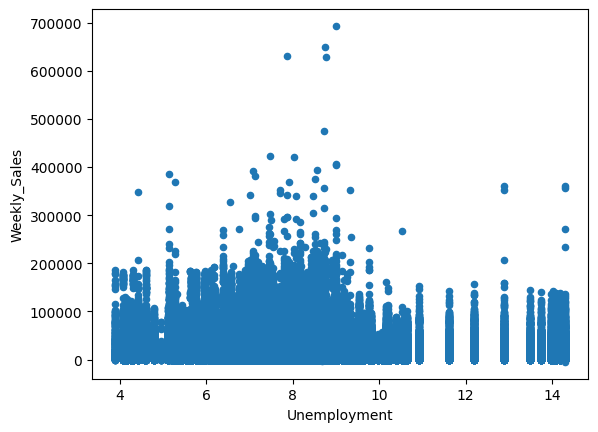

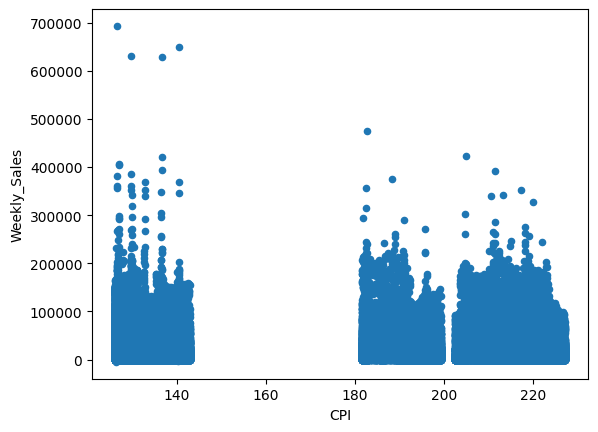

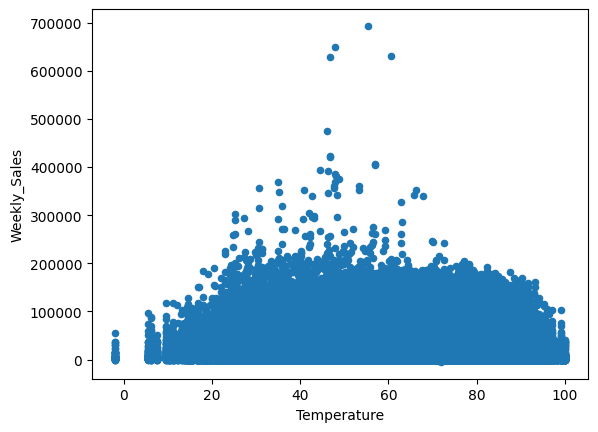

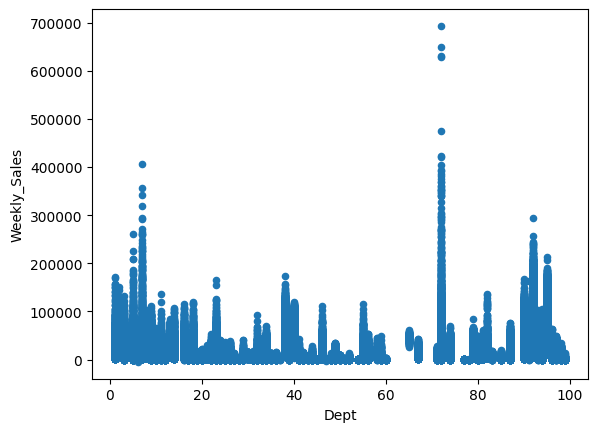

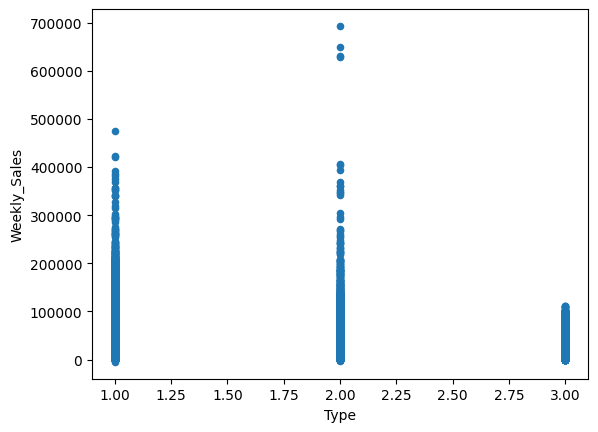

In [42]:
def scatter_plot_var(var):
    data = pd.concat([dataset['Weekly_Sales'],dataset[var] ], axis=1)
    data.plot.scatter(x=var, y='Weekly_Sales')
scatter_plot_var("Unemployment")
scatter_plot_var("CPI")
scatter_plot_var("Temperature")
scatter_plot_var("Dept")
scatter_plot_var("Type")

The type 2 have more extreme values,as well as Dept 70, Temperature 50-60.



So, we'll define the extreme values for week sales>=4000000 and see some distributions, peaks in time series.

# Ploting columns with few unique values

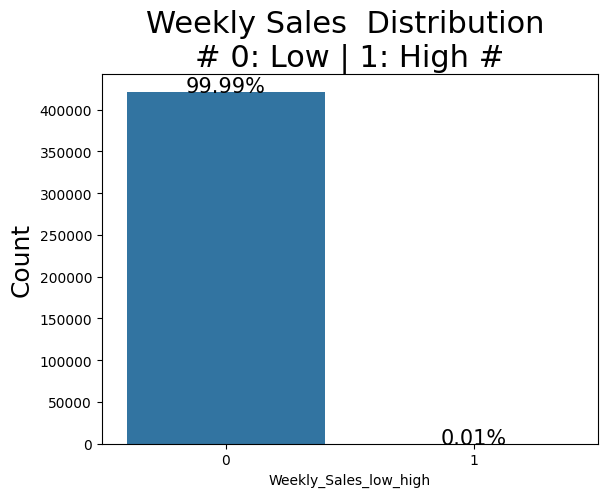

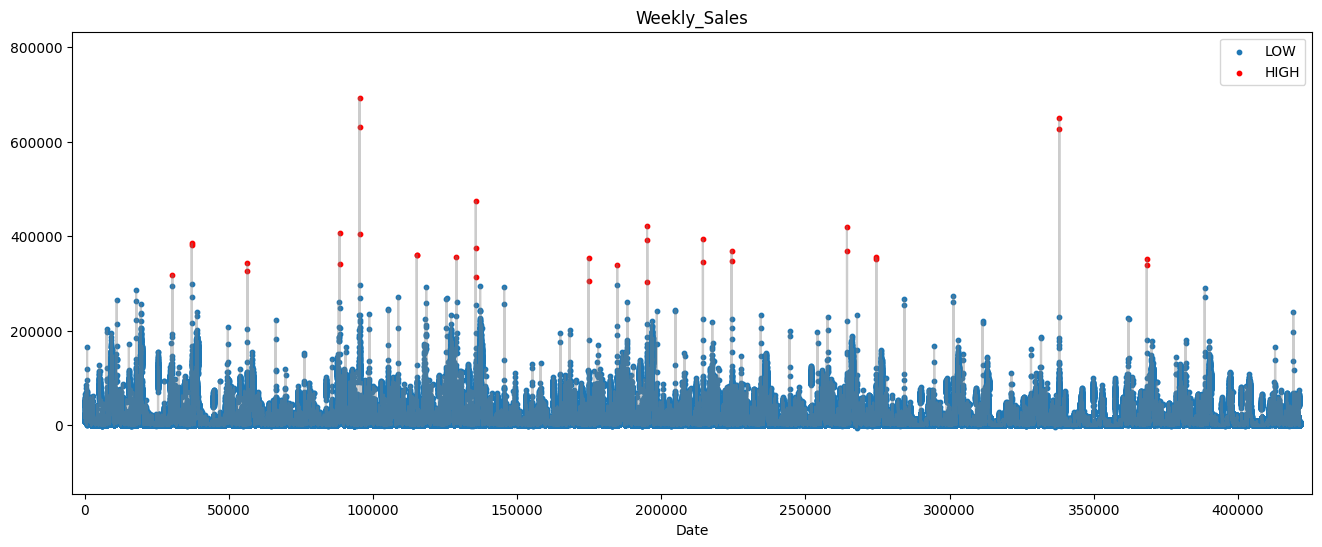

In [47]:
plot_target_dist(dataset)
ts_target_lowhigh(dataset, 300000)


Identifying Week Sales Peaks with Change Finger